# Demo Code of Keysight AWG M9336A

In [1]:
from qcodes.instrument_drivers.QSD.WaveformGenerator import WaveformGenerator as wfg
from qcodes.instrument_drivers.Keysight.M9336A import M9336A
import matplotlib.pyplot as plt
import numpy as np

In [2]:
deviceResourceString = 'PXI16::0::0::INSTR'
awg = M9336A('awg', deviceResourceString)

Initializing ...
True
Initialization complete.


Create waveform

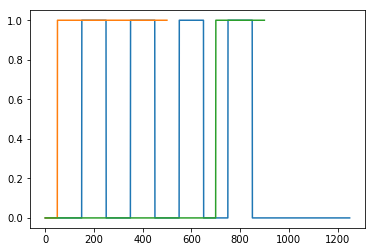

In [3]:
SR = 1.28e9 # sample rate
pulse_amplitude = 1

waveform = wfg.combine(wfg.delay(150e-9,SR),
                       wfg.pulse(pulse_amplitude,100e-9,SR),
                       wfg.delay(100e-9,SR),
                       wfg.pulse(pulse_amplitude,100e-9,SR),
                       wfg.delay(100e-9,SR),
                       wfg.pulse(pulse_amplitude,100e-9,SR),
                       wfg.delay(100e-9,SR),
                       wfg.pulse(pulse_amplitude,100e-9,SR),
                       wfg.delay(400e-9, SR))

marker_gate = wfg.combine(wfg.delay(50e-9,SR),
                          wfg.pulse(pulse_amplitude,450e-9,SR))
marker_acq = wfg.combine(wfg.delay(700e-9,SR),
                         wfg.pulse(pulse_amplitude,200e-9,SR))
plt.plot(wfg.time(waveform,SR)/1e-9,waveform)
plt.plot(wfg.time(marker_gate,SR)/1e-9,marker_gate)
plt.plot(wfg.time(marker_acq,SR)/1e-9,marker_acq)
plt.show()

Correct lengths of waveform and markers arrays:

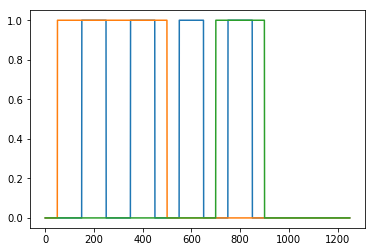

In [4]:
waveform, marker_gate, marker_acq = wfg.length_correction(waveform, marker_gate, marker_acq)
plt.plot(wfg.time(waveform,SR)/1e-9,waveform)
plt.plot(wfg.time(marker_gate,SR)/1e-9,marker_gate)
plt.plot(wfg.time(marker_acq,SR)/1e-9,marker_acq)
plt.show()

Generate a proper array of markers compatible with AWG:

In [16]:
markersArray = awg.generate_MarkersArray(marker_gate,marker_acq,marker_acq)

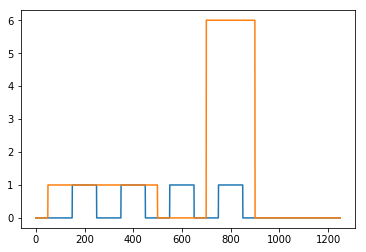

In [17]:
plt.plot(wfg.time(waveform,SR)/1e-9, waveform)
plt.plot(wfg.time(markersArray,SR)/1e-9,markersArray)
plt.show()

Sets Channel Parameters

In [18]:
awg.ch1.SampleRate(SR)
awg.ch1.OperationMode(0) # 0=continiuos 1=burst
awg.ch1.TerminalConfiguration(0) # single-ended
awg.ch1.Gain(0.4)
awg.ch1.Offset(0)

Operation mode set to:  0
KEY: 1 = burst, 0 = continuous
Terminal Configuration set to:  0
KEY: 1 = differential, 0 = single-ended


In [19]:
awg.ch1.ChannelMode()

ChannelMode =  0
KEY: 1 = marker, 0 = waveform


0

Load waveform and markers:

In [20]:
wf_name = ''
awg.ch1.load_waveform(wf_name,waveform,markersArray)

Channel initalization:

In [21]:
awg.ch1.init_channel()

Enable channel:

In [22]:
awg.ch1.enable()

Configure markers:

In [23]:
awg.ch1.configure_markers()

Destination bit of 16 corresponds to External1
Destination bit of 17 corresponds to External2
Destination bit of 18 corresponds PXI_TRIG0


In [24]:
awg.ch1.BurstCount(1)

Initiate generation:

In [25]:
awg.ch1.initiate_generation()

Trying to initiate AWG generation.
If the error "The current pending state has 1 conflicts" occures during generation initiating, try to reduce gain and/or offset values.


Abort generation:

In [26]:
awg.ch1.abort_generation()

In [20]:
awg.disconnect()

In [22]:
awg.close()